In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
# Sigmoid function and derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [ ]:
# Hyperparameters
n = 3  # Number of input features
h = 4  # Number of hidden neurons
epochs = 1000  # Training iterations
learning_rate = 0.1

In [ ]:
# Step 1: Generate Synthetic Cybersecurity Dataset
def generate_data(samples=1500):
    np.random.seed(42)
    data = []
    labels = []

    for _ in range(samples):
        packet_size = np.random.randint(50, 1500)  # Packet size in bytes
        connection_duration = np.random.uniform(0.1, 5.0)  # Connection duration in seconds
        failed_attempts = np.random.randint(0, 10)  # Number of failed connection attempts

        # Label: Attack if failed attempts > 3 and packet size > 1000
        attack = 1 if (failed_attempts > 3 and packet_size > 1000) else 0

        data.append([packet_size, connection_duration, failed_attempts])
        labels.append(attack)

    return np.array(data), np.array(labels)

X, Y = generate_data()



In [ ]:
X.shape


(1500, 3)

In [ ]:

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(h, n)
b1 = np.random.randn(h, 1)
W2 = np.random.randn(1, h)
b2 = np.random.randn(1, 1)

In [ ]:
# Training loop
train_losses = []
test_losses = []

for epoch in range(epochs):
    total_loss = 0
    for i in range(X_train.shape[0]):
        x_i = X_train[i].reshape(n, 1)
        y_i = Y_train[i].reshape(1, 1)

        # Forward propagation
        z1 = np.dot(W1, x_i) + b1
        a1 = np.tanh(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = sigmoid(z2)

        # Compute cost
        loss = - (y_i * np.log(a2) + (1 - y_i) * np.log(1 - a2))
        total_loss += loss[0, 0]

        # Backward propagation
        dz2 = a2 - y_i
        dW2 = dz2 * a1.T
        db2 = dz2
        dz1 = (W2.T @ dz2) * (1 - a1**2)
        dW1 = dz1 @ x_i.T
        db1 = dz1

        # Gradient descent update
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # Store average loss for epoch
    train_losses.append(total_loss / X_train.shape[0])

    # Compute loss on test set
    test_loss = 0
    for i in range(X_test.shape[0]):
      x_i = X_test[i].reshape(n, 1)
      y_i = Y_test[i].reshape(1, 1)
      z1 = np.dot(W1, x_i) + b1
      a1 = np.tanh(z1)
      z2 = np.dot(W2, a1) + b2
      a2 = sigmoid(z2)
      loss = - (y_i * np.log(a2) + (1 - y_i) * np.log(1 - a2))
      test_loss += loss[0, 0]

    test_losses.append(test_loss / X_test.shape[0])




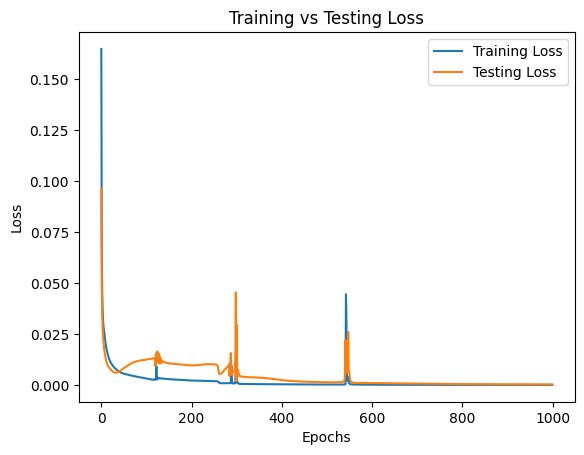

In [ ]:
# Plot training and testing curves
plt.plot(range(epochs), train_losses, label="Training Loss")
plt.plot(range(epochs), test_losses, label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Testing Loss")
plt.show()

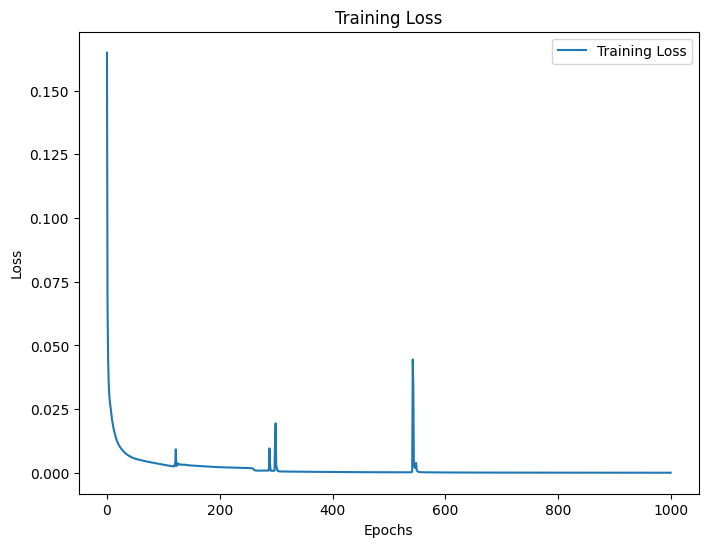

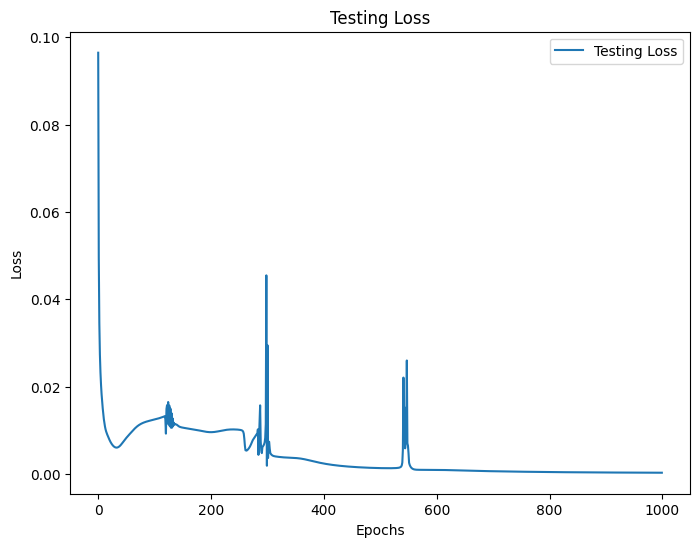

In [ ]:
# Create a figure for training loss
plt.figure(figsize=(8, 6))  # Optional: set figure size
plt.plot(range(epochs), train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

# Create a separate figure for testing loss
plt.figure(figsize=(8, 6))  # Optional: set figure size
plt.plot(range(epochs), test_losses, label="Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Testing Loss")
plt.legend()
plt.show()

In [ ]:
# Step 4: Evaluate Model
correct = 0
predictions = []
for i in range(len(X_test)):
      z1 = np.dot(W1, x_i) + b1
      a1 = np.tanh(z1)
      z2 = np.dot(W2, a1) + b2
      a2 = sigmoid(z2)
      y_pred = 1 if a2 > 0.5 else 0
      predictions.append(y_pred)
      if y_pred == Y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 81.00%


In [ ]:
# Step 5: Test with a Sample Case
test_sample = np.array([[1200, 3.5, 5]])  # Sample input
scaled_sample = scaler.transform(test_sample)  # Apply same normalization

z1 = np.dot(W1, x_i) + b1
a1 = np.tanh(z1)
z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)

# Step 5: Test with a Sample Case
test_sample = np.array([[1200, 3.5, 5]])  # Sample input
scaled_sample = scaler.transform(test_sample)  # Apply same normalization

z1 = np.dot(W1, scaled_sample.T) + b1
a1 = np.tanh(z1)
z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)

final_prediction = 1 if a2 > 0.5 else 0

print(f'Test Sample Prediction: {"Attack" if final_prediction == 1 else "Normal"}')

Test Sample Prediction: Attack
